In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from learntools.time_series.utils import seasonal_plot

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/store-sales-time-series-forecasting/oil.csv
/kaggle/input/store-sales-time-series-forecasting/sample_submission.csv
/kaggle/input/store-sales-time-series-forecasting/holidays_events.csv
/kaggle/input/store-sales-time-series-forecasting/stores.csv
/kaggle/input/store-sales-time-series-forecasting/train.csv
/kaggle/input/store-sales-time-series-forecasting/test.csv
/kaggle/input/store-sales-time-series-forecasting/transactions.csv


### Leemos el archivo **stores.csv** con el comando **pd.read_csv** y lo asignamos al dataframe **stores**

In [2]:
stores = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/stores.csv')
oil = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/oil.csv')
transactions = pd.read_csv('/kaggle/input/store-sales-time-series-forecasting/transactions.csv')

### Visualizamos los primeros 5 registros del dataframe con el comando **head()**

In [3]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
all = transactions.merge(stores, how="left", on="store_nbr")

In [5]:
all = transactions.merge(oil, how="left", on="date")

In [6]:
all.head(1)

,date,store_nbr,transactions,dcoilwtico
0,2013-01-01,25,770,NaN


In [7]:
all['date'] =  pd.to_datetime(all['date'], infer_datetime_format=True)
all["date"] = all["date"].dt.to_period('D')

In [8]:
all.head(1)

,date,store_nbr,transactions,dcoilwtico
0,2013-01-01,25,770,NaN


<AxesSubplot:title={'center':'Seasonal Plot (year/dayofyear)'}, xlabel='dayofyear', ylabel='transactions'>

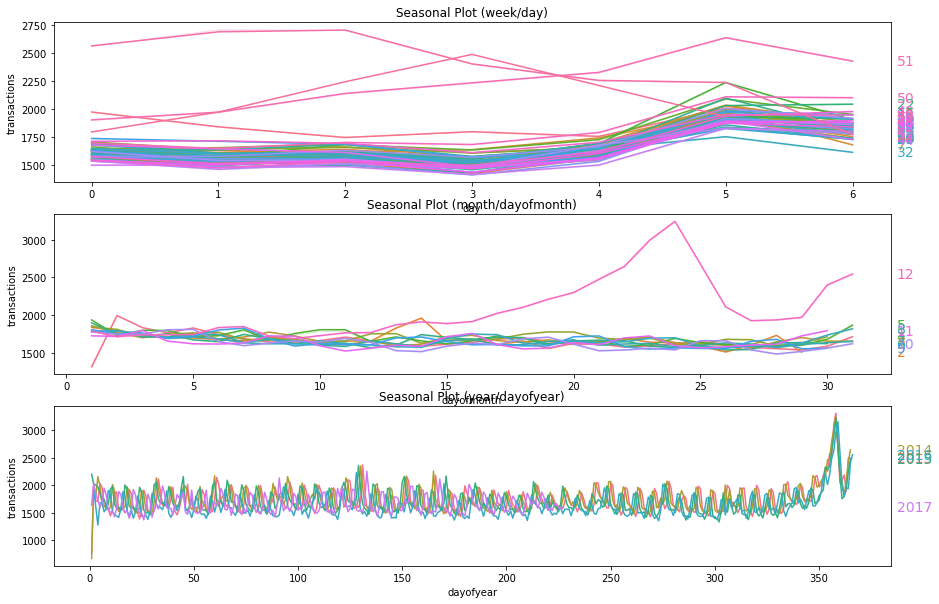

In [9]:
X = (
    all
    .groupby('date').mean()
    .squeeze()
)

X["day"] = X.index.dayofweek
X["week"] = X.index.week

X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year

X["dayofmonth"] = X.index.day
X["month"] = X.index.month

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(15, 10))

seasonal_plot(X, y="transactions", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="transactions", period="month", freq="dayofmonth", ax=ax1)
seasonal_plot(X, y="transactions", period="year", freq="dayofyear", ax=ax2)